In [22]:
from matplotlib import pyplot as plt
from PIL import Image as PILImage
from quantiphy import Quantity
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
%matplotlib widget

In [2]:
# %pip install quantiphy

In [4]:
from calibrate import CalibrationManual
cm=CalibrationManual()
cm.load_calibration(r"..\..\example\data\set_a\a_5x.miscal")
cm.distances

{'pixel': 599.006361608906, 'length': 1, 'length_unit': 'mm'}

In [8]:
qty=Quantity(f"{cm.distances['length']} {cm.distances['length_unit']}")
print(qty)
print(qty.real)
print(qty.units)

1 mm
0.001
m


In [15]:
qty2=Quantity("10nm")
print(qty2)
print(qty2.real)
print(qty2.units)

qty3=Quantity("200um")
print(qty3)
print(qty3.real)
print(qty3.units)

qty4=Quantity("200 angstrom")
print(qty4)
print(qty4.real)
print(qty4.units)

qty5=Quantity("1in")
print(qty5)
print(qty5.real)
print(qty5.units)

ratio=qty3/qty2
print(ratio)

10 nm
1e-08
m
200 um
0.0002
m
200 angstrom
2e-16
ngstrom
1 in
1.0
in
20000.0


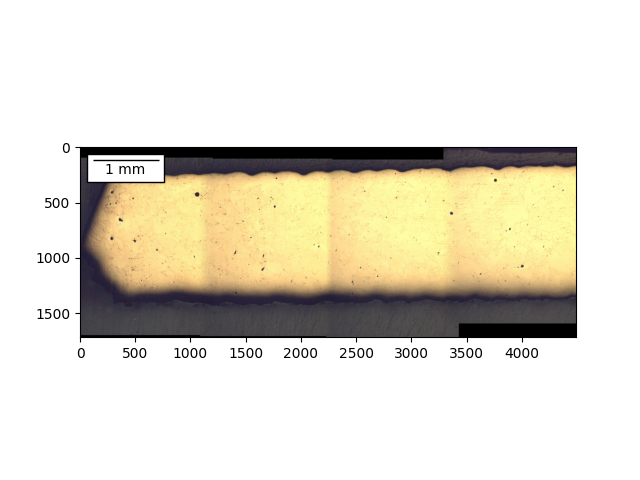

In [40]:
blended_image_fp=r"..\..\example\expected_result\set_a\a_mycanvas_blend.jpg"
fig = plt.figure()
plt.imshow(PILImage.open(blended_image_fp).transpose(2))
scale_bar=AnchoredSizeBar(
    plt.gca().transData,
    int(cm.distances["pixel"]),
    str(Quantity(f"{cm.distances['length']} {cm.distances['length_unit']}")),
    'upper left',
    pad=0.4,borderpad=0.5,sep=2,frameon=True,
)
plt.gca().add_artist(scale_bar)
plt.show()

